# Computational Finance

---

An interactive version of this report is available at (much recommended):

<https://github.com/martinandrovich/pyfin/blob/main/report/report.ipynb>

---

Written by:

- Martin Androvich (<marta16@student.sdu.dk>)
- Peter Ørholm Nielsen (<pniel17@student.sdu.dk>)

for the course **Mathematical modelling and machine learning applied for finance** , under the supervision of [Claus Vaarning](https://portal.findresearcher.sdu.dk/en/persons/cv) at the **University of Southern Denmark**.

Claus, we thank you for your guidance and valiant effort, going through this journey with us.

---

Computational finance can be largely summarized by two areas of interest:

- Efficient and accurate of fair values of financial securities
- Modelling of stochastic time series

Generally, the objective is to **develop a theoretically sound model** and **perform pricing** (implement tools), based on a **set of requirements** (portfolio, risk etc.). The model should perform in all kinds of circumstances (market crash, unexpected move etc.).

This project case dives into the **fundamentals of computational finance**, herein the basic stochastic processes, stock dynamics models, and pricing of European options using analytical and numerical solutions.

---

<div style="page-break-after: always;"></div>

## Options fundamentals

### Options

An option is a **contract** written by a seller (writer), sold to a buyer at a **premium**, which gives the buyer the option (not obligation) to **exercise** the contract and buy the **underlying asset** (e.g., stock) at a pre-viously agreed **strike price** before the contract **matures** with respect to an **expiration date**. A seller of an option might get **assigned**, if the buyer decides to exercise.

The **premium** (price) of an option is based on the **intrinsic value** and **extrinsic value**. The intrinsic value is simply the difference between the stock price and strike price. The **extrinsic value** is based on **time to expiration** and **implied volatility**. Volatility is more predictable than stock price.

<!-- ![](./img/options-price.png) -->
<p align="center"><img src="./img/options-price.png"></p>

If an option is worthless at expiration $t = T$, it is said to be **out of the money**; vice versa for **in the money** options. The **moneyness** of an option is a **ratio** of the **strike-to-stock** price $\frac{K}{S\left(t\right)}$ with respect to the stock price at $S(t)$.

<div style="page-break-after: always;"></div>

For example, a call option at a strike of 140 (the right to buy the stock at that price) and current stock price of 125 will be completely useless at expiration (cost 0), since it provides no value, with a moneyness of $\frac{140}{125} = 1.12$, **thus out of the money**.

<!-- ![](./img/options-atm.png) -->
<p align="center"><img src="./img/options-atm.png"></p>

At expiration, **the remaining value** of an option is only the intrinsic value (difference between stock price and strike price), since there is no time value left. Therefore, all out-of-the money stocks are worth 0 at expiration.

Options are especially powerful since they provide **leverage**. That is, one can bet on the *change of the stock* without necessaritly buying the stock, gaining more investing capital (money to be used elsewhere).

---

### Payoff function

Given a stock $S(t)$ with strike $K$ and maturity $T$, the **payoff** $H(S,T)$ defines the profit of an option. For a **call option** at maturity $T$ is given by

$$V_{call}\left(T,\ S_T\right)=\max{\left(S_T-K,0\right)}$$

where $S_T := S(T)$ is the stock price at maturity $T$. Likewise, the value of a **put option** is given by

$$V_{put}\left(T,\ S_T\right)=\max{\left(K-S_T,0\right)}$$

which can be visualized as a **payoff diagram** (stock price on $x$-axis) for the four different cases:

<!-- ![](./img/options-diagram.png) -->
<p align="center"><img src="./img/options-diagram.png"></p>

Here, a **long put** indicates that the investor hopes that the **value of the option** goes up (long on the option), which means the investor is actually **short on the underlying** (short on the stock).

---

### Implied volatility

Implied volatility is a **forward-looking metric** (unlike historical volatility) of an underlying stock. It represents the **one standard deviation expected price range** over a one-year period, **based on the current option prices**.

The implied volatility is a metric based on what the **marketplace is “implying”** the volatility of the stock will be in the future, based on **price changes in an option**. Based on truth and rumors in the market-place, option prices will begin to change. Therefore, the price of options will change independently of the underlying stock price.

<!-- ![](./img/options-movement.png) -->
<p align="center"><img src="./img/options-movement.png"></p>

Technically, **implied volatility** is calculated by taking the market price of the option, entering it into the **Black-Scholes formula**, and **back-solving** for the value of the volatility.



<div style="page-break-after: always;"></div>

## Stochastic processes

A stochastic process $X(t)$ is a variable whose value changes over time in an uncertain manner. A stock at time $t$ in a known (observered) interval $t ∈ [t_0, T]$ is defined by a stochastic process

$$
X(t, \omega)
$$

of two variables, meaning that the stock price can be interpreted as a realization at some time $t$ and probabilistic space $\omega$ (path) within an ensemble of realizations $\omega \in \Omega$:

![](./img/sde-example.png)

---

### Implementation and comparison of ABM, GBM and OU processes

There are three fundamental stochastic processes:

| Stochastic process               |                              Equation                             |
|----------------------------------|:-----------------------------------------------------------------:|
| Arithmetic Brownian Motion (ABM) |            $$dS(t) = \mu \cdot dt + \sigma \cdot dW(t)$$            |
| Geometric Brownian Motion (GBM)  | $$dS(t) = \mu \cdot S(t) \cdot dt + \sigma \cdot S(t) \cdot dW(t)$$ |
| Ornstein-Uhlenbeck (OU)          |   $$dS(t) = \kappa (\theta - X(t)) \cdot dt + \sigma \cdot dW(t)$$  |

All of which are based on the Wiener process $W(t)$. In the implementation of the stochastic processes, the most important property of the Winer process

\begin{equation}
	W(t + \Delta t) - W(t) =
	dW(t) = \varepsilon(t) \cdot \sqrt{\Delta t},
\end{equation}

such that the change in the Wiener process is defined by a random component $\varepsilon(t)$ and is dependent on the size of the time step $\Delta t$, allowing to write

\begin{equation}
	dW(t) \sim \mathcal{N}(0, \Delta t).
\end{equation}

<div style="page-break-after: always;"></div>

In the [`pyfin.sde` module][pyfin-sde], the methods [`abm()`], [`gbm()`], and [`ou()`] are implemented to demonstrate the different stochastic processes. These are all sampled with a predefined seed for reproducibility.

> Notice that e.g. [`abm()`] is a link that can be clicked to look at the code at GitHub!

[pyfin-sde]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py
[`abm()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py#L7-L44
[`gbm()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py#L47-L86
[`ou()`]:  https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py#L89-L120

In [1]:
%run ./config/setup.py

In [2]:
from pyfin.sde import abm, gbm, ou

# parameters

s0 = 1
mu = 0.05
sigma = 0.05
T = 100
dt = 0.01
num_paths = 26

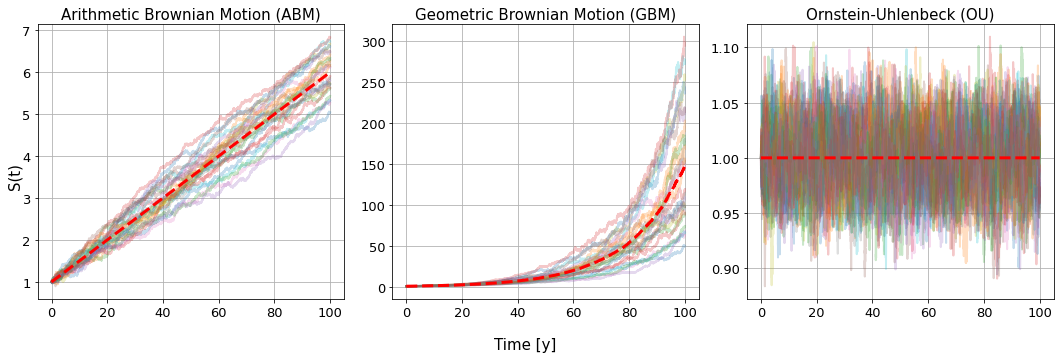

In [3]:
# plot

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

t, S = abm(s0=s0, mu=mu, sigma=sigma, T=T, dt=dt, num_paths=num_paths, reproducible=True)
axs[0].plot(t, S.T, alpha=0.25)
axs[0].plot(t, np.mean(S, axis=0), "r--", linewidth=3)
axs[0].set_title("Arithmetic Brownian Motion (ABM)")

t, S, X = gbm(s0=s0, mu=mu, sigma=sigma, T=T, dt=dt, num_paths=num_paths, reproducible=True)
axs[1].plot(t, S.T, alpha=0.25)
axs[1].plot(t, np.mean(S, axis=0), "r--", linewidth=3)
axs[1].set_title("Geometric Brownian Motion (GBM)")

t, S = ou(s0=s0, kappa=1.5, theta=1.0, sigma=sigma, T=T, dt=dt, num_paths=num_paths, reproducible=True)
axs[2].plot(t, S.T, alpha=0.25)
axs[2].plot(t, np.mean(S, axis=0), "r--", linewidth=3)
axs[2].set_title("Ornstein-Uhlenbeck (OU)")

for ax in axs.flat:
	ax.ticklabel_format(useOffset=False, style="plain")
	ax.grid()
fig.supylabel("S(t)"); fig.supxlabel("Time [y]");

<div style="page-break-after: always;"></div>

---

### GBM calibration using MLE

Given $m$ number of samples with timestep $\Delta t$ from Tesla (`TSLA`) stock, a maximum-likelohood estimator (MLE) is used to estimate the parameters $\hat{\mu}$ and $\hat{\sigma}$ of a stock $S(t)$ under log transform, as

\begin{equation}
	X(t) = \log(S(t)),
\end{equation}

for which the estimators are given by

\begin{equation}
	\hat{\mu} = \frac{1}{m \Delta t} \cdot (X(t_{m}) - X(t_{0}))
	\quad , \quad
	\hat{\sigma}^{2} = \frac{1}{m \Delta t} \cdot \sum_{k=0}^{m-1} (X(t_{k+1}) - X(t_{k}) - \hat{\mu} \Delta t)^{2}.
\end{equation}

The data set contains closing prices between 2010 and 2018.

In [4]:

import pyfin.datasets

t, S, dt = pyfin.datasets.TSLA()
X = np.log(S)
m = len(t)

# maximum-likelihood estimation based on (2.36)

mu = 1/(m * dt) * (X[-1] - X[0])
s = 1/(m * dt) * np.sum([(X[i + 1] - X[i] - mu * dt) ** 2 for i in range(m - 1)])
sigma = sqrt(s)

print(f"MLE calibration yields μ = {mu:.4f} and σ = {sigma:.4f}.")

# simulate ABM

t_est, X_sim = abm(s0=log(S[-1]), mu=mu, sigma=sigma, T=365, dt=1, num_paths=10, reproducible=True)
S_sim = np.exp(X_sim)

MLE calibration yields μ = 0.0014 and σ = 0.0318.


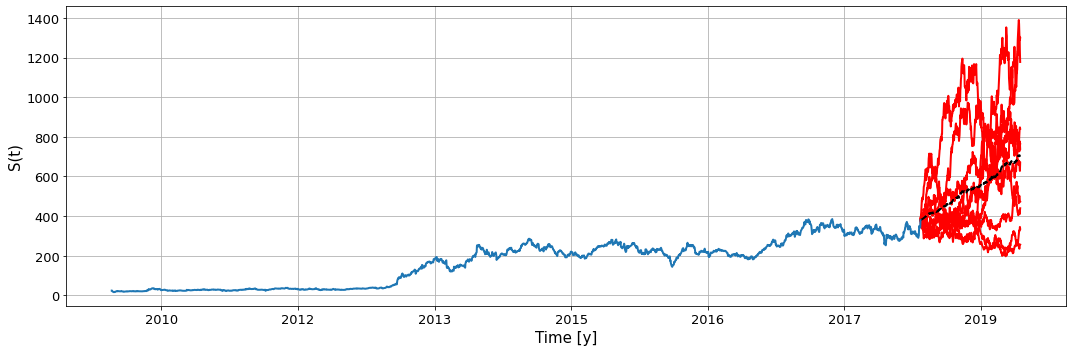

In [5]:
# plot

plt.figure(figsize=(15,5))
plt.plot(t_est + t[-1], S_sim.T, "-r")
plt.plot(t_est + t[-1], np.mean(S_sim, axis=0), "--k", linewidth=2)
plt.plot(t, S.T)
plt.gca().xaxis.set_major_formatter(lambda x, pos: mdates.num2date(x).strftime("%Y"))
plt.xlabel("Time [y]"); plt.ylabel("S(t)"); plt.grid()

<div style="page-break-after: always;"></div>

---

### Correlated Brownian motion

A a system of SDEs can be written as

\begin{equation}
	d \mathbf{X}
	= \bar{\mathbf{\mu}}dt + \mathbf{D}\mathbf{L} d\tilde{\mathbf{W}}
	= \bar{\mathbf{\mu}}dt + \bar{\mathbf{\sigma}} d\tilde{\mathbf{W}},
\end{equation}

where the matrix $\bar{\mathbf{\sigma}} = \mathbf{D} \cdot \mathbf{L}$ now associates each stochastic process $X_i (t)$ with a random process and defines the linear dependencies (correlations). The matrix $\mathbf{D}$ is the design matrix which maps the interaction of the Brownian motions inbetween the SDEs, whereas lower triangular matrix $\mathbf{L}$ is extracted from the Cholesky decomposition of a correlation matrix $\mathbf{C}$. This allows to express the system of SDEs in terms of a vector of ucorrelated Brownian motions $\tilde{\mathbf{W}}$.

In the [`pyfin.sde` module][pyfin-sde], the [`abm_corr()`] method implements $(5)$, which is showcased by a $2 \times 2$ correlation matrix $\mathbf{C}$ with different values of $\rho_{1,2}$.

[pyfin-sde]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py
[`abm_corr()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py#L123-L151

In [6]:
from pyfin.sde import abm_corr

# parameters

mu = np.array([0.05, 0.1])
D = np.eye(2, 2)  # mapping of S[] to W[]
rho = 0.7

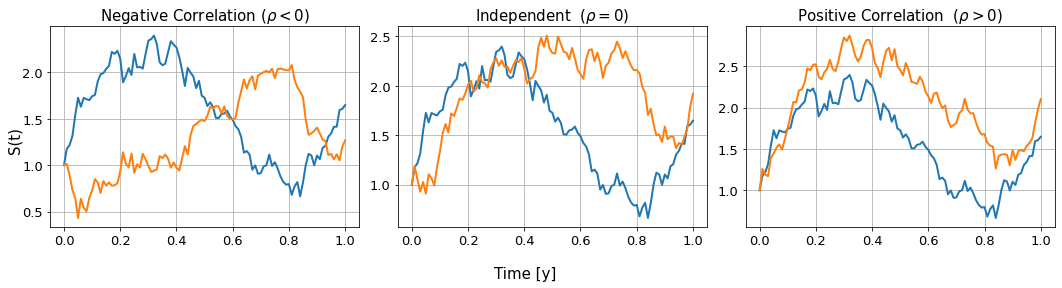

In [7]:

# plot

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

C = np.array([[1, -rho], [-rho, 1]])
t, S = abm_corr(s0=1, mu=mu, D=D, C=C, T=1, reproducible=True)
axs[0].plot(t, S[0]); axs[0].plot(t, S[1])
axs[0].set_title(r"Negative Correlation ($\rho < 0$)")

C = np.array([[1, 0], [0, 1]])
t, S = abm_corr(s0=1, mu=mu, D=D, C=C, T=1, reproducible=True)
axs[1].plot(t, S[0]); axs[1].plot(t, S[1])
axs[1].set_title(r"Independent  ($\rho = 0$)")

C = np.array([[1, rho], [rho, 1]])
t, S = abm_corr(s0=1, mu=mu, D=D, C=C, T=1, reproducible=True)
axs[2].plot(t, S[0]); axs[2].plot(t, S[1])
axs[2].set_title(r"Positive Correlation  ($\rho > 0$)")

for ax in axs.flat: ax.grid()
fig.supylabel("S(t)"); fig.supxlabel("Time [y]");

[pyfin-sde]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py

<div style="page-break-after: always;"></div>

## Option pricing

Option pricing estimates the value of an option contract by estimating a price, known as a premium, based on a stochastic model.

---

### Black-Scholes model

Given a stock $S(t)$ is modelled under the risk-neutral Geometric Brownian Motion (GBM) model, the Black-Scholes model allows to compute the theoretical value of an option contract for European options based on five input variables:

![](./img/bs-model-overview.png)

for which the dynamics of the stock and option value, under risk-neutral measure $\mathbb{Q}$, are given by

\begin{align}
	dS(t) &= r \cdot S(t) \cdot dt + \sigma \cdot S(t) \cdot dW^{\mathbb{Q}}(t),
	\\
	dV(t, S) &= \left( \frac{\partial V(t,S)} {\partial t} + r \frac{\partial V(t,S)} {\partial S} + \frac{1}{2}  \sigma^2 \frac{\partial^2 V(t,S)} {\partial S^2} \right)dt + \sigma  \frac{\partial V} {\partial S} dW^{\mathbb{Q}} ,
\end{align}

which yields the Black-Scholes pricing PDE

\begin{equation}
	\frac{dV(t, S)}{\partial t}  + rS \frac{\partial V(t,S)} {\partial S} + \sigma^2 \frac{\partial^2 V(t,S)} {\partial S^2} - rV(t,S) = 0,
\end{equation}

with a terminal condition $V(T, S) = H(T, S)$ specified by some payoff function $H(T, S)$ at time $T$, based on whether the type of the option contract (CALL or PUT).

The Black-Scholes model is based on several assumtions:

- European options only exercised at maturity $T$.
- The asset price (and returns) follows a log-normal random walk driven by GBM.
- Interest rate $r$ and volatility $\sigma$ are known and deterministic/constant.
- Transaction costs for continuous re-balancing ($\Delta t$) are ignored.
- Dividend payouts are ignored.
- Independent of drift term $\mu$, but driven by volatility $\sigma$.

<div style="page-break-after: always;"></div>

The **Feynman-Kac theorem** allows to express the solution to a PDE with a terminal condition (in this case the Black-Scholes pricing PDE) in terms of an expectation

\begin{equation}
	V(t) = e^{-r(T-t)} \cdot \mathbb{E}^{\mathbb{Q}} [H(T,S) | \mathcal{F}(t)],
\end{equation}

where the expectation can be solved using simulation or integration. An analytical solution is then given by

\begin{equation}\begin{split}
	V_{c}(t,S)  & = S(t)F_{\mathcal{N(0,1)}}(d_1) - Ke^{-r(T-t)}F_{\mathcal{N(0,1)}}(d_2),
	\\
	V_{p}(t,S)  & = Ke^{-r(T-t)}F_{\mathcal{N(0,1)}}(-d_2) - S(t)F_{\mathcal{N(0,1)}}(-d_{1}),
\end{split}\end{equation}

with

\begin{equation}
	d_1 = \frac{ \log\frac{S(t)}{K} + (r + \frac{1}{2} \sigma^2)(T-t)}{\sigma \sqrt{T-t}} \quad, \quad d_2 = d_1 - \sigma \sqrt{T-t},
\end{equation}
and $ F_{\mathcal{N(0,1)}} $ being the CDF of a standard normal distribution.

In the [`pyfin.black_scholes` module], two methods are implemented for option pricing: analytical and numerical, respectively [`bs()`] and [`bs_mc()`], both of which take the similar inputs and return an estimated option price.

The analytical method utilizes the analytical Feynman-Kac solution given by $(10)$. The numerical method computes $n$ number of stock prices at expiration, given by

\begin{equation}
	S(t) = S_0 \cdot \exp{((r - 1/2 \cdot \sigma^2) \cdot (t - t_0) + \sigma \cdot (W^{\mathbb{Q}}(t) - W^{\mathbb{Q}}(t_0)))}
\end{equation}

thus not needing simulate the timesteps inbetween expiration. The option price is then estimated as given by $(4)$ using the discounted mean of the payoff of the simulated stock prices.

<div style="page-break-after: always;"></div>

The two methods are compared accross different strike prices, where the numerical method is furhter compared accross the number of paths $n$ used in simulation of the GBM.

[`pyfin.black_scholes` module]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/black_scholes.py
[`bs()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/black_scholes.py#L9-L20
[`bs_mc()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/black_scholes.py#L23-L36

In [1]:
%run ./config/setup.py

In [2]:
from pyfin.black_scholes import bs, bs_mc

# parameters

s0 = 100
r = 0.05
sigma = 0.1
T = 1
K = range(80, 110, 1)


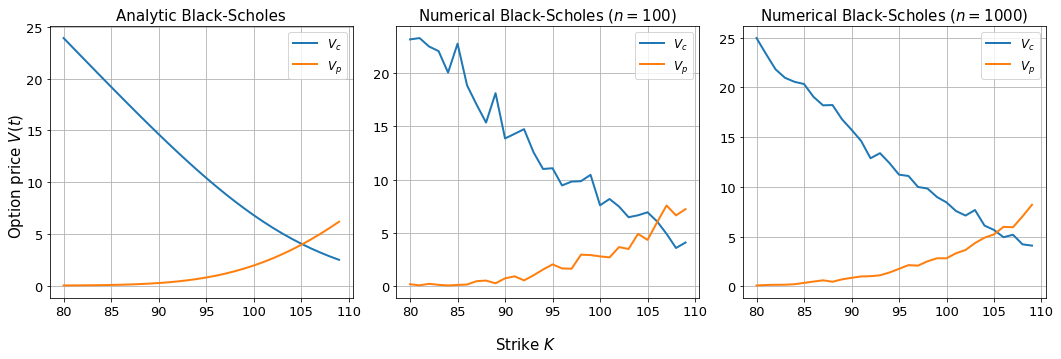

In [3]:
# plot

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
np.random.seed(DEFAULT_SEED)

Vc = [bs(option_type="CALL", K=k, T=T, s0=s0, r=r, sigma=sigma) for k in K]
Vp = [bs(option_type="PUT", K=k, T=T, s0=s0, r=r, sigma=sigma) for k in K]
axs[0].plot(K, Vc, label=r"$V_c$")
axs[0].plot(K, Vp, label=r"$V_p$")
axs[0].set_title("Analytic Black-Scholes")

Vc = [bs_mc(option_type="CALL", K=k, T=T, s0=s0, r=r, sigma=sigma, num_paths=100) for k in K]
Vp = [bs_mc(option_type="PUT", K=k, T=T, s0=s0, r=r, sigma=sigma, num_paths=100) for k in K]
axs[1].plot(K, Vc, label=r"$V_c$")
axs[1].plot(K, Vp, label=r"$V_p$")
axs[1].set_title(r"Numerical Black-Scholes ($n=100$)")

Vc = [bs_mc(option_type="CALL", K=k, T=T, s0=s0, r=r, sigma=sigma, num_paths=1000) for k in K]
Vp = [bs_mc(option_type="PUT", K=k, T=T, s0=s0, r=r, sigma=sigma, num_paths=1000) for k in K]
axs[2].plot(K, Vc, label=r"$V_c$")
axs[2].plot(K, Vp, label=r"$V_p$")
axs[2].set_title(r"Numerical Black-Scholes ($n=1000$)")

for ax in axs.flat:
	ax.legend()
	ax.grid()
fig.supylabel(r"Option price $V(t)$"); fig.supxlabel(r"Strike $K$");

<div style="page-break-after: always;"></div>

---

### Merton model (jump diffusion)

For a stock process $X(t) = \log{S(t)}$, the Arithmetic Brownian Motion with Jumps is modelled as

\begin{equation}
	dX(t) = (r - \xi_p \cdot \mathbb{E}[e^{J(t)} - 1] - \frac{1}{2} \cdot \sigma^2) dt + \sigma dW^{\mathbb{Q}}(t) + J(t) \cdot dX^{\mathbb{Q}}_{\mathcal{P}}(t)),
\end{equation}

driven by a Poisson process $dX^{\mathbb{Q}}_{\mathcal{P}}(t)$ with an **intensity** $\xi_p$ which indicates the average time between jumps (i.e., spacing of the jumps), such that the exepcted number of events is given by $\mathbb{E}[X^{\mathbb{Q}}_{\mathcal{P}}(t)] = \xi_p \cdot dt$, for a time interval $dt$. The **stochastic jump magnitude** $J(t)$ is normally distributed $J(t) \sim \mathcal{N}(\mu_J, \sigma_J)$. The model is then parameterized by $[r, \sigma, \mu_J, \sigma_J, \xi_p]$, which can be calibrated using historical data. Given that $J(t)$ is normally distributed, calculation of $\mathbb{E}[e^{J(t)} - 1])$ is given by $\exp{(\mu_J \cdot \frac{\sigma_J^2}{2})} - 1$.

The [`pyfin.sde` module] module implements the [`merton()`] method for simulation of Merton model.

[`pyfin.sde` module]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py
[`merton()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py#L154-L186

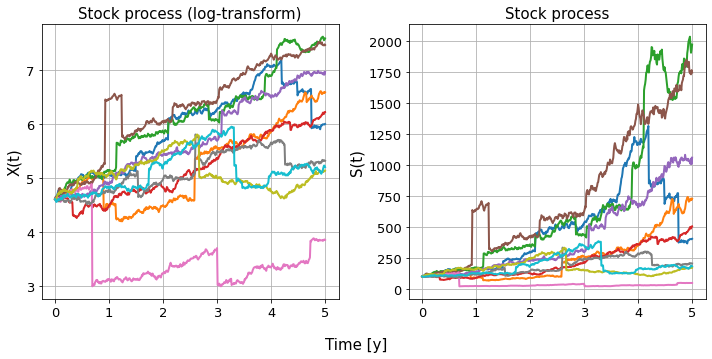

In [4]:
from pyfin.sde import merton

t, S, X = merton(s0=100, r=0.5, sigma=0.2, mu_J=0, sigma_J=0.5, xi_p=1, T=5, reproducible=True)

# plot

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(t, X.T)
axs[0].set_ylabel("X(t)")
axs[0].set_title("Stock process (log-transform)")

axs[1].plot(t, S.T)
axs[1].set_ylabel("S(t)")
axs[1].set_title("Stock process")

for ax in axs.flat:
	ax.ticklabel_format(useOffset=False, style="plain")
	ax.grid()
fig.supxlabel("Time [y]");

Option pricing using the Merton model can be performed using the analytical solution (given by $(5.28)$ in [Mathematical Modeling and Computation in Finance; Cornelis W Oosterlee, Lech A Grzelak]) or using the COS method (given the charachteristic function of the Merton model).

The COS method uses an iterative expansion (adding extra terms to a sum like Taylor series, where more terms equals better approximation) in which density recovery is achieved by replacing the den-sity by its Fourier-cosine series expansion.

Given $x := X(t) = \log{S(t)}$ and $y := X(T)$, the value of a plain vanilla European option under the Merton model is given by

\begin{equation}
V\left(t_0,x\right)=e^{-e\tau}\cdot\mathbb{E}\left[V\left(T,y\right)\ |\ \mathcal{F}\left(t_0\right)\right]=e^{-r\tau}\cdot\int_{\mathbb{R}}{V\left(T,y\right)\cdot f_X\left(T,y;t_0,x\right)\ dy}
\end{equation}

where $\tau=T - t_0$, and $f_X(T,y;t_0,x) = f_X(y)$ is the transition probability density of $X(T)$ (from $t_0 \rightarrow T$) and is thus dependent on the parameters of the stochastic process $X(t)$.

An approximation is, in summary, given by: (1) truncating the integration domain, (2) approximating the probability density function using Fourier series-expansion, and (3) interchanging the integral and summation in term of cosine series coefficients of the payoff function, which are solved analytically. The option value is then given by

\begin{equation}
	V(t_0, x) = e^{-r \tau} \cdot \sum_{k=0}^{N-1}{}^{'} \text{Re} \left\{ \phi_X \left(\frac{k \pi}{b - a} \right) \exp \left(-ik\pi \frac{a}{b - a} \right)\right\} \cdot H_k
\end{equation}

where $N$ is the number of expansion terms, $\Sigma^{'}(\cdot)$ is a summation in which the first term is halfed, $\phi_X(u; x, t, T)$ is the charachteristic function, and $H_k$ are the cosine series coefficients of the payoff function.

In the [`pyfin.merton` module], the [`merton()`] method implements the analytical solution, whereas the [`merton_cos()`] method implmenents the COS-based solution, using the helper functions [`merton_chf()`] and [`merton_H_k()`]. The two methods are compared in a similar way to the Black-Schole implementation, using the same base parameters, also comparing two different values of $N$ (number of Fourier series summation terms).

[`pyfin.merton` module]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/merton.py
[`merton()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/merton.py#L6-L38
[`merton_cos()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/merton.py#L41-L56
[`merton_chf()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/merton.py#L59-L74
[`merton_H_k()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/merton.py#L77-L94


In [5]:
from pyfin.merton import merton, merton_cos

# parameters

s0 = 100
r = 0.05
sigma = 0.1
mu_J = 0
sigma_J = 0.5
xi_p = 1
T = 1
K = range(80, 110, 1)
L = 8
a, b = (-L * sqrt(T), L * sqrt(T))

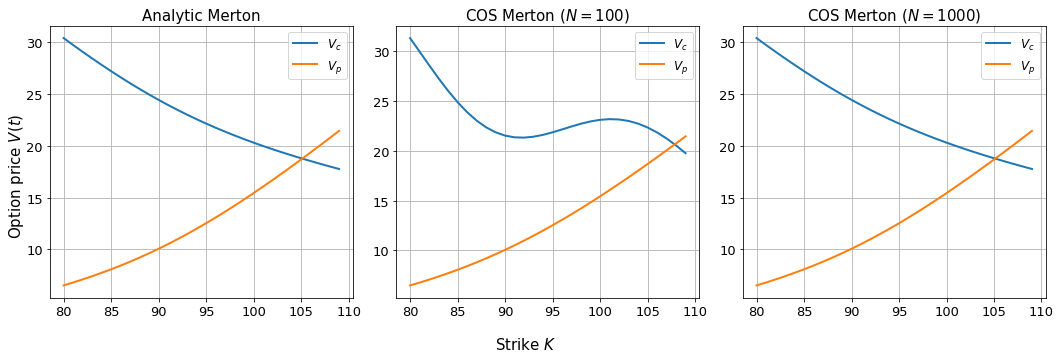

In [6]:
# plot

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
np.random.seed(DEFAULT_SEED)

Vc = [merton(option_type="CALL", K=k, T=T, s0=s0, r=r, sigma=sigma, mu_J=mu_J, sigma_J=sigma_J, xi_p=xi_p) for k in K]
Vp = [merton(option_type="PUT", K=k, T=T, s0=s0, r=r, sigma=sigma, mu_J=mu_J, sigma_J=sigma_J, xi_p=xi_p) for k in K]
axs[0].plot(K, Vc, label=r"$V_c$")
axs[0].plot(K, Vp, label=r"$V_p$")
axs[0].set_title("Analytic Merton")

Vc = [merton_cos(option_type="CALL", K=k, T=T, s0=s0, r=r, sigma=sigma, mu_J=mu_J, sigma_J=sigma_J, xi_p=xi_p, a=a, b=b, N=100) for k in K]
Vp = [merton_cos(option_type="PUT", K=k, T=T, s0=s0, r=r, sigma=sigma, mu_J=mu_J, sigma_J=sigma_J, xi_p=xi_p, a=a, b=b, N=100) for k in K]
axs[1].plot(K, Vc, label=r"$V_c$")
axs[1].plot(K, Vp, label=r"$V_p$")
axs[1].set_title(r"COS Merton ($N=100$)")

Vc = [merton_cos(option_type="CALL", K=k, T=T, s0=s0, r=r, sigma=sigma, mu_J=mu_J, sigma_J=sigma_J, xi_p=xi_p, a=a, b=b, N=1000) for k in K]
Vp = [merton_cos(option_type="PUT", K=k, T=T, s0=s0, r=r, sigma=sigma, mu_J=mu_J, sigma_J=sigma_J, xi_p=xi_p, a=a, b=b, N=1000) for k in K]
axs[2].plot(K, Vc, label=r"$V_c$")
axs[2].plot(K, Vp, label=r"$V_p$")
axs[2].set_title(r"COS Merton ($N=1000$)")

for ax in axs.flat:
	ax.legend()
	ax.grid()
fig.supylabel(r"Option price $V(t)$"); fig.supxlabel(r"Strike $K$");

<div style="page-break-after: always;"></div>

---

### Heston model

The Heston model is a **stochastic volatility model** for pricing of European options, which models the volatility $\sigma(t)$ as a random process with the following properties:

- It factors in a possible correlation between a stock's price and its volatility.
- It conveys volatility as reverting to the mean.
- It does not require that stock prices follow a lognormal probability distribution.

The model is defined by two **correlated stochastic differential equations** under risk neutral measure $\mathbb{Q}$, namely: (1) the underlying asset price $S(t)$, and (2) the variance process $v(t)$, as

\begin{equation}
	\left\{\begin{matrix}dS\left(t\right)=rS\left(t\right)dt+\sqrt{v\left(t\right)}\cdot S\left(t\right)\cdot d W_x^\mathbb{Q}\left(t\right)\\dv\left(t\right)=\kappa\left(\bar{v}-v\left(t\right)\right)dt+\gamma\sqrt{v\left(t\right)}\cdot d W_v^\mathbb{Q}\left(t\right)\\\end{matrix}\right.
\end{equation}

with $dW_{x}^{\mathbb{Q}}(t) \cdot dW_{v}^{\mathbb{Q}}(t) = \rho_{x, v}$, in which the variance process $v(t)$ is driven by a CIR process. It should be noted that $\sqrt{v(t)}$ requires a truncation scheme, e.g., $v(t) = \max{(v(t), 0)}$, in order to avoid invalid square root computations.

The Heston model can be written in terms of **independent Brownian motions**, as

\begin{equation}
	\left[\begin{matrix}dS(t)\\dv(t)\\\end{matrix}\right]=\left[\begin{matrix}r\cdot S(t)\\\kappa\left(\bar{v}-v\left(t\right)\right)\\\end{matrix}\right]dt+\sqrt{v\left(t\right)}\cdot\left[\begin{matrix}S\left(t\right)&0\\\gamma\cdot\rho_{x,v}&\gamma\cdot\sqrt{1-\rho_{x,v}^2}\\\end{matrix}\ \right]\ \left[\begin{matrix}d{\widetilde{W}}_x^\mathbb{Q}\left(t\right)\\d{\widetilde{W}}_v^\mathbb{Q}\left(t\right)\\\end{matrix}\right]
\end{equation}

such that the Heston model depends on  $[S_0, v_0] > 0$. and is parameterized by $[r, \bar{v}, \kappa, \gamma, \rho_{x, v}]$, being the interest rate, long-term mean of the variance process, speed of mean reversion, volatility of the volatility (vol-vol), and the correlation between the two processes (typically negative), respectively.

The [`pyfin.sde` module] module implements the [`heston()`] method for simulation of Heston model.

[`pyfin.sde` module]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py
[`heston()`]:https://github.com/martinandrovich/pyfin/blob/main/pyfin/sde.py#L189-L224

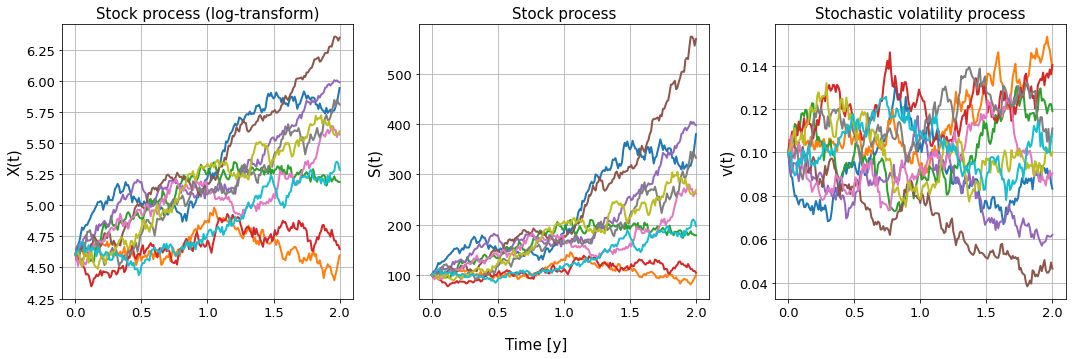

In [7]:
from pyfin.sde import heston

t, S, X, V = heston(s0=100, r=0.5, v0=0.1, v_bar=0.1, kappa=0.5, gamma=0.1, rho=-0.75, T=2, num_paths=10, reproducible=True)

# plot

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
np.random.seed(DEFAULT_SEED)

axs[0].plot(t, X.T)
axs[0].set_ylabel("X(t)")
axs[0].set_title("Stock process (log-transform)")

axs[1].plot(t, S.T)
axs[1].set_ylabel("S(t)")
axs[1].set_title("Stock process")

axs[2].plot(t, V.T)
axs[2].set_ylabel("v(t)")
axs[2].set_title("Stochastic volatility process")

for ax in axs.flat:
	ax.ticklabel_format(useOffset=False, style="plain")
	ax.grid()
fig.supxlabel("Time [y]");

Option pricing using the Heston model can be achieved using several approaches:

- **Monte Carlo simulation**

	Simulate paths using Heston model dynamics and compute the price using Feynman Kac.

- **Almost-exact simulation**

	Simulate almost-exact paths using Heston model dynamics by utilizing analytical CIR process expression, and compute the price using Feynman Kac.

- **COS method**

	Define the characteristic function and compute price using COS-method (similar to Merton COS method).

The **Monte Carlo simulation** and pricing algorithm can be summarized by:

- Discretize the time interval $t\in\left[0,T\right]$ into $t_i\in\left[t_0\ ..\ t_m\right]$ steps.
- Generate asset values $s_{ij}$ for time $i\in\left[0\ ..\ m\right]$ and path $j\in\left[0\ ..\ N\right]$ of $N$ number of realizations.
- Compute $H_j$ payoff values for each of the $N$ realizations, as $H_j=H\left(T,s_{mj}\right)$
- Compute the average $\mathbb{E}\left[H\left(T,S\right)\right]\approx{\bar{H}}_N=\frac{1}{N}\sum_{N} H_j$
- Compute the option value $V\left(t,S\right)\approx e^{-r\left(T-t\right)}\cdot{\bar{H}}_N$ and determine standard error.

In the [`pyfin.heston` module], the methods [`heston_cos()`], [`heston_mc()`] and [`heston_aes()`] implement the various methods for pricing of European options using the Heston model.

[`pyfin.heston` module]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/heston.py
[`heston_cos()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/heston.py#L26-L37
[`heston_mc()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/heston.py#L8-L14
[`heston_aes()`]: https://github.com/martinandrovich/pyfin/blob/main/pyfin/heston.py#L17-L23

In [8]:
from pyfin.heston import heston_cos, heston_mc, heston_aes

# parameters

s0 = 100
r = 0.05
v0 = 0.04
v_bar = 0.04
kappa = 0.5
gamma = 0.1
rho = -0.9
T = 1
K = range(80, 110, 1)
L = 8
a, b = (-L * sqrt(T), L * sqrt(T))

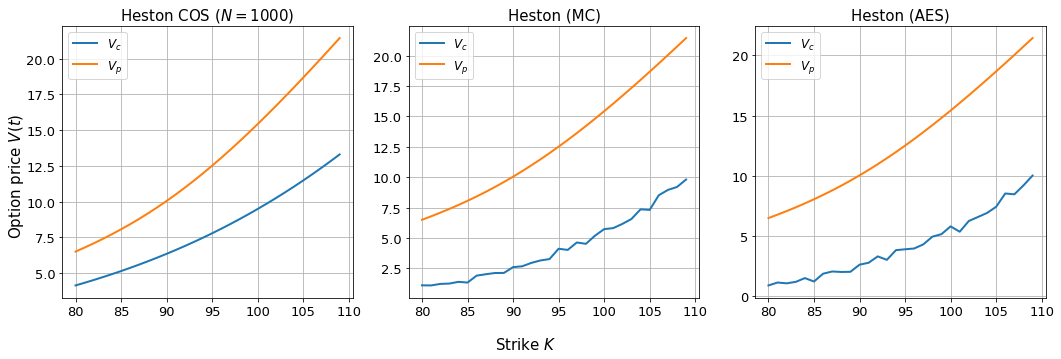

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
np.random.seed(DEFAULT_SEED)

Vc = [heston_cos(option_type="CALL", K=k, T=T, s0=s0, r=r, v0=v0, v_bar=v_bar, kappa=kappa, gamma=gamma, rho=rho, a=a, b=b, N=1000) for k in K]
Vc = [heston_cos(option_type="PUT", K=k, T=T, s0=s0, r=r, v0=v0, v_bar=v_bar, kappa=kappa, gamma=gamma, rho=rho, a=a, b=b, N=1000) for k in K]
axs[0].plot(K, Vc, label=r"$V_c$")
axs[0].plot(K, Vp, label=r"$V_p$")
axs[0].set_title(r"Heston COS ($N=1000$)")

Vc = [heston_mc(option_type="CALL", K=k, T=T, s0=s0, r=r, v0=v0, v_bar=v_bar, kappa=kappa, gamma=gamma, rho=rho, num_paths=1000) for k in K]
Vc = [heston_mc(option_type="PUT", K=k, T=T, s0=s0, r=r, v0=v0, v_bar=v_bar, kappa=kappa, gamma=gamma, rho=rho, num_paths=1000) for k in K]
axs[1].plot(K, Vc, label=r"$V_c$")
axs[1].plot(K, Vp, label=r"$V_p$")
axs[1].set_title("Heston (MC)")

Vc = [heston_aes(option_type="CALL", K=k, T=T, s0=s0, r=r, v0=v0, v_bar=v_bar, kappa=kappa, gamma=gamma, rho=rho, num_paths=1000) for k in K]
Vc = [heston_aes(option_type="PUT", K=k, T=T, s0=s0, r=r, v0=v0, v_bar=v_bar, kappa=kappa, gamma=gamma, rho=rho, num_paths=1000) for k in K]
axs[2].plot(K, Vc, label=r"$V_c$")
axs[2].plot(K, Vp, label=r"$V_p$")
axs[2].set_title("Heston (AES)")

for ax in axs.flat:
	ax.legend()
	ax.grid()
fig.supylabel(r"Option price $V(t)$"); fig.supxlabel(r"Strike $K$");

The advantage of the AES approach over the MC method may not be apparent at first. However, when comparing the standard error with respect to the step size, the AES approach boasts a significant increase in accuracy, even at larger step sizes, as demonstrated in the table below (taken from [Mathematical Modeling and Computation in Finance; Cornelis W. Oosterlee, Lech A. Grzelak]), which shows the standard error for different step sizes at different strikes.

![](./img/heston-mc-vs-aes-std-error.png)